In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from MMDBalancing import MMDBalancing as MMDB
%matplotlib inline

## Build synthetic data set

In [2]:
n = 500
m = 480
xi = torch.normal(mean = -1, std = 3, size = (n,1))
xi_ring = torch.zeros(size = (m,1))
for i in range(m):
    if torch.rand(1).item()>0.3:
        xi_ring[i,0] = torch.normal(mean = -4, std = 2, size = (1,)).item()
    else:
        xi_ring[i,0] = torch.normal(mean = 3, std = 0.2, size = (1,)).item()

## Build MMDBalancing class

In [3]:
MMDB = MMDB()
eta_ring = torch.rand((len(xi),),requires_grad=True)

## Gradient Descent (with ADAM)

In [4]:
epochs = 10000
loss_trace = []
for i in range(epochs):
    loss_trace.append(MMDB.GD(xi,xi_ring,eta_ring,learning_rate = 0.001).item())
    #eta_ring = torch.abs(eta_ring)
print("Done!")

Calculating kernel matrices...
Kernel matrices constructed!
Done!


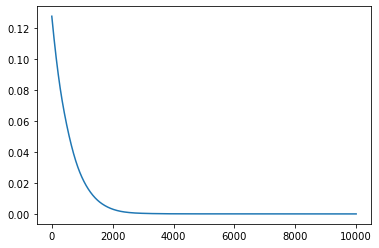

In [5]:
plt.plot(np.array(loss_trace))

## Viz

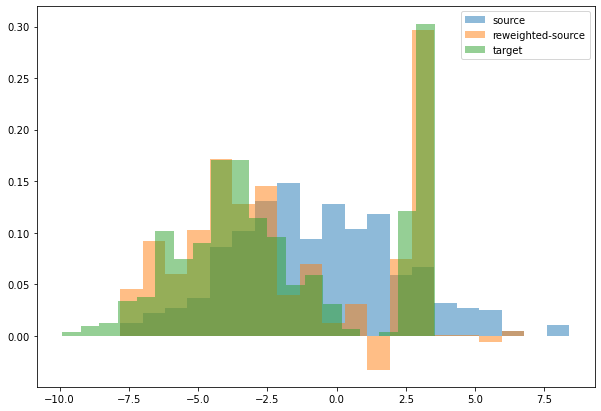

In [6]:
plt.figure(figsize = (10,7))
plt.hist(xi[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 20, label ="source", density = True)
plt.hist(xi[:,0].to("cpu").detach().numpy(),weights = eta_ring.detach().numpy() , alpha = 0.5, bins = 20, label ="reweighted-source", density = True)
plt.hist(xi_ring[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 20, label ="target", density = True)
plt.legend()

In [7]:
eta_ring.mean()

tensor(0.9958, grad_fn=<MeanBackward0>)